Import the appropriate libraries numpy, matplotlib, and the animation package from matplotlib

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

Set frequency list: Must be between 30 and 140 Hz. If the user wants less than 10 frequencies, set the others to 0 Hz. 

In [23]:
Hz01=40
Hz02=45
Hz03=82
Hz04=83
Hz05=84
Hz06=85
Hz07=86
Hz08=110
Hz09=112
Hz10=114

Initialize each data set with blank arrays

In [24]:
def init():
    line.set_data([], [])
    return (line,)

Define the animation functions; set_data for both plots in single animation and update resolution counter

In [25]:
def animate(i):
    t_steps = 5000*(i+1)/200
    t = np.linspace(0, 0.01*i, t_steps)
    s = np.sin(Hz01 * 2 * np.pi * t) + np.sin(Hz02 * 2 * np.pi * t) + np.sin(Hz03 * 2 * np.pi * t) + np.sin(Hz04 * 2 * np.pi * t) + np.sin(Hz05 * 2 * np.pi * t) + np.sin(Hz06 * 2 * np.pi * t) + np.sin(Hz07 * 2 * np.pi * t) + np.sin(Hz08 * 2 * np.pi * t) + np.sin(Hz09 * 2 * np.pi * t) + np.sin(Hz10 * 2 * np.pi * t)
    fft = np.fft.fft(s)
    T = t[1] - t[0]  #cadence 
    N = s.size
    f = np.linspace(0, 1 / T, N) #1/T cutoff freque
    y = np.abs(fft)*1/N
    res = 1/t[len(t)-1]
    res_round = "{0:.2f}".format(res)
    line2.set_label('Resolution = ' + str(res_round) + ' Hz')
    legend = plt.legend(loc='upper right')
    line.set_data(t, s)
    line2.set_data(f, y)
    return legend,

Create the subplots to display lightcurve and FT simultaneously and render as HTML video

/home/jwkern/.local/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  
/home/jwkern/.local/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


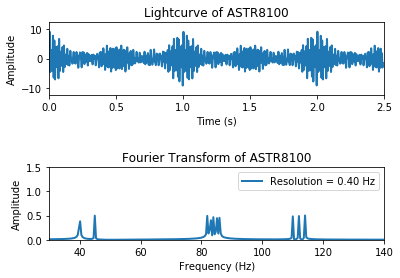

In [26]:
fig, ax = plt.subplots(2)
line, = ax[0].plot([], [], lw=2)
line2, = ax[1].plot([], [], lw=2)
fig.subplots_adjust(hspace=1.0)
ax[0].set_ylabel('Amplitude')
ax[0].set_xlabel('Time (s)')
ax[0].set_title('Lightcurve of ASTR8100')
ax[0].set_xlim(( 0, 2.5))
ax[0].set_ylim((-12.25, 12.25))
ax[1].set_ylabel('Amplitude')
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_title('Fourier Transform of ASTR8100')
ax[1].set_xlim(30, 140)
ax[1].set_ylim(0, 1.5)
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=250, interval=100, blit=True)
HTML(anim.to_html5_video())

Note: The resolution initially is not good enough to distinguish individual peaks, but with longer observing time the doublet, quintuplet, the triplet are seen clearly. 